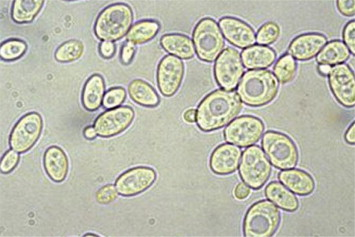

In [ ]:
import cv2
from skimage.filters.rank import entropy
from skimage.morphology import disk
import pandas as pd

img = cv2.imread('yeast_cell.jpg')
from google.colab.patches import cv2_imshow
cv2_imshow (img)


img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2



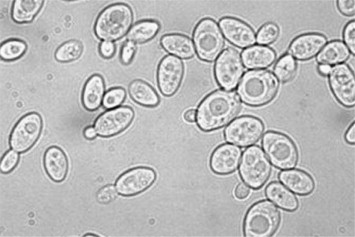

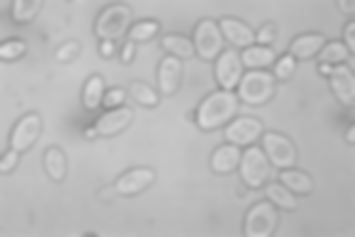

In [ ]:
from scipy import ndimage  as nd
gaussian_img = nd.gaussian_filter(img , sigma = 3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1
from google.colab.patches import cv2_imshow
cv2_imshow (img)

from google.colab.patches import cv2_imshow

cv2_imshow (gaussian_img)
cv2.waitKey()
cv2.destroyAllWindows()

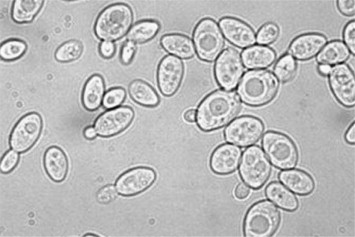

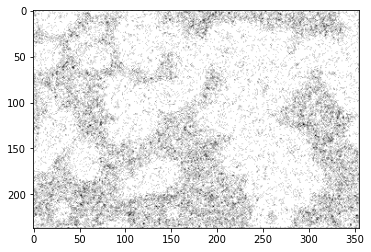

In [ ]:
import cv2
from skimage.filters.rank import entropy
from skimage.morphology import disk
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
cv2_imshow (img)
# Apply entropy filter
entropy_img = entropy(img, disk(1))

# Display filtered image
plt.imshow(entropy_img, cmap='gray')
cv2.waitKey()
cv2.destroyAllWindows()

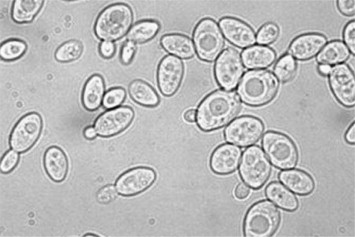

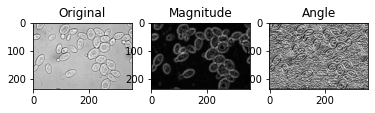

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
cv2_imshow (img)
# Load image
img = cv2.imread('yeast_cell.jpg', 0)

# Apply Sobel filter in x-direction
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

# Apply Sobel filter in y-direction
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Compute magnitude and angle of gradient
mag, angle = cv2.cartToPolar(sobel_x, sobel_y, angleInDegrees=True)


# Display filtered image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(mag, cmap='gray')
plt.title('Magnitude')

plt.subplot(1, 3, 3)
plt.imshow(angle, cmap='gray')
plt.title('Angle')
plt.show()


In [ ]:
from skimage.filters import sobel
sobel_img = sobel(img)
sobel1 = sobel_img.reshape(-1)
df['Sobel'] = sobel1
print(df.head())

   Original Image  Gaussian s3     Sobel
0             194          187  0.016782
1             190          187  0.019262
2             192          186  0.026398
3             195          186  0.028499
4             193          186  0.026921


Area: 0.0
Perimeter: 12.0
Moments: {'m00': 3544755.0, 'm10': 672628800.0, 'm01': 361890135.0, 'm20': 160779012150.0, 'm11': 69859020465.0, 'm02': 49523861865.0, 'm30': 42295699779150.0, 'm21': 16702847045055.0, 'm12': 9618445317765.0, 'm03': 7838615773755.0, 'mu20': 33145507834.627007, 'mu11': 1189189337.915619, 'mu02': 12577875524.528452, 'mu30': -791577149165.6243, 'mu21': -162663944223.55173, 'mu12': -21681449162.023174, 'mu03': 214445640920.48987, 'nu20': 0.0026378629608953194, 'nu11': 9.464083409523478e-05, 'nu02': 0.001001001768880539, 'nu30': -3.3460135034200674e-05, 'nu21': -6.875839638186575e-06, 'nu12': -9.16479483349337e-07, 'nu03': 9.064663008853444e-06}
Centroid: 189 102
Area: 870.0
Perimeter: 117.25483298301697
Moments: {'m00': 3544755.0, 'm10': 672628800.0, 'm01': 361890135.0, 'm20': 160779012150.0, 'm11': 69859020465.0, 'm02': 49523861865.0, 'm30': 42295699779150.0, 'm21': 16702847045055.0, 'm12': 9618445317765.0, 'm03': 7838615773755.0, 'mu20': 33145507834.627007, 'mu1

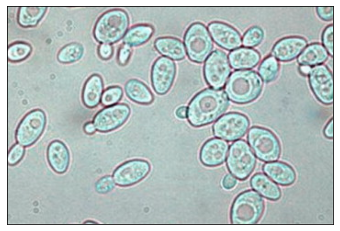

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# Load the image
img = cv2.imread('yeast_cell.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Find the contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Calculate features of the contours
for contour in contours:
    # Area
    area = cv2.contourArea(contour)
    # Perimeter
    perimeter = cv2.arcLength(contour, True)
    # Compactness
    #compactness = perimeter**2 / (4*3.1416*area)
    #Moments
    canny_edges = cv2.Canny(gray , 30 ,200)
    moments = cv2.moments(canny_edges)

    # Centroid
    cx = int(moments['m10'] / moments['m00'])
    cy = int(moments['m01'] / moments['m00'])

    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    
    # Do something with the features (e.g., print them out)
    print('Area:', area)
    print('Perimeter:', perimeter)
    print('Moments:', moments)
    print('Centroid:', cx, cy)
